# TATA Online Retail Data Analysis

In [1]:
!pip install kagglehub
import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import kagglehub
kagglehub.login()
#export KAGGLE_USERNAME="sairithinchakka"
#export KAGGLE_KEY="1e08c5be3caa3b6caae533dcb2fdcddb"

## Download the latest version

In [3]:
# Download latest version
#path = kagglehub.dataset_download("ishanshrivastava28/tata-online-retail-dataset", force_download=True)
#print("Path to dataset files:", path)

In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
df = pd.read_csv(r"C:\Users\sairi\.cache\kagglehub\datasets\ishanshrivastava28\tata-online-retail-dataset\versions\1/Online Retail Data Set.csv", encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [41]:
# Find duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)

original_row_count = df.shape[0]
print(original_row_count)

# Remove duplicates from the dataset
df= df.drop_duplicates()

# Display the number of rows before and after removing duplicates to confirm changes
cleaned_row_count = df.shape[0]
print(cleaned_row_count)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

             InvoiceDate  UnitPrice  CustomerID         Country  
517     01-12-2010 11:45       1.

In [7]:
df.describe()    

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,536641.000000,536641,536641.000000,401604.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,15281.160818
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,13939.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,15145.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,219.130156,NaN,97.233118,1714.006089


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [9]:
# For categorical 'CustomerID', use mode imputation
imputer = SimpleImputer(strategy='most_frequent')
df['CustomerID'] = imputer.fit_transform(df[['CustomerID']])
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [10]:
# Precompute mode-based descriptions for each StockCode
description_impute = df.groupby('StockCode')['Description'].apply(lambda x: x.mode()[0] if not x.mode().empty else "Unknown Item")

# Fill missing descriptions
df['Description'] = df['Description'].fillna(df['StockCode'].map(description_impute))

# Checking for missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [42]:
summary_stats = df.describe()
manual_stats = {
    "count": df.count(),
    "mean": df.mean(numeric_only=True),
    "std": df.std(numeric_only=True),
    "min": df.min(numeric_only=True),
    "25%": df.quantile(0.25, numeric_only=True),
    "50%": df.median(numeric_only=True),
    "75%": df.quantile(0.75, numeric_only=True),
    "max": df.max(numeric_only=True),
}

# Convert manual_stats to a DataFrame for comparison
manual_stats_df = pd.DataFrame(manual_stats)

# Validate that the two outputs match
validation = summary_stats.equals(manual_stats_df)

# Print Results
if validation:
    print("Test Passed: Summary statistics match the manually computed statistics.")
else:
    print("Test Failed: Discrepancies found in summary statistics.")
    print("\nGenerated Statistics:")
    print(summary_stats)
    print("\nManually Computed Statistics:")
    print(manual_stats_df)

Test Failed: Discrepancies found in summary statistics.

Generated Statistics:
            Quantity                    InvoiceDate      UnitPrice  \
count  536641.000000                         536641  536641.000000   
mean        9.620029  2011-07-04 08:57:06.087421952       4.632656   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 10:52:00       1.250000   
50%         3.000000            2011-07-19 14:04:00       2.080000   
75%        10.000000            2011-10-18 17:05:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       219.130156                            NaN      97.233118   

          CustomerID  
count  401604.000000  
mean    15281.160818  
min     12346.000000  
25%     13939.000000  
50%     15145.000000  
75%     16784.000000  
max     18287.000000  
std      1714.006089  

Manually Computed Statistics:
              count          mean          std      

In [11]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
list_cols=list(df.columns)
numerical_cols=[]
for i in list_cols:
    if df[i].dtype!='object':
        numerical_cols.append(i)

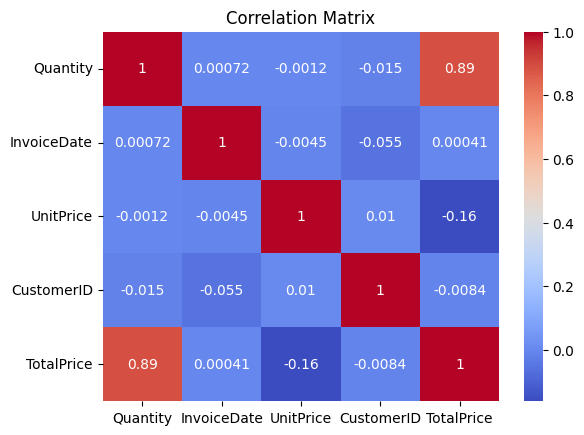

In [12]:
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

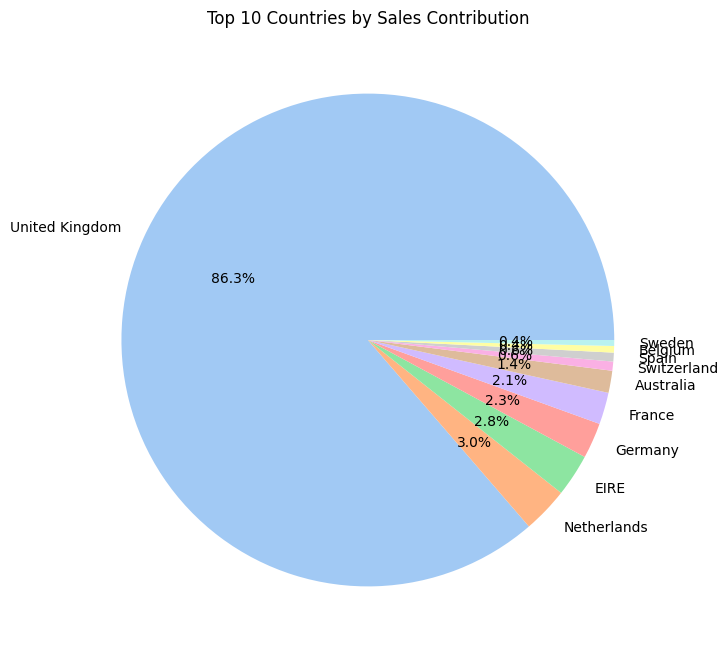

In [13]:
# Regional Analysis
# Group by 'Country' and calculate total sales
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Plot the top 10 countries in a pie chart
country_sales.head(10).plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=sns.color_palette('pastel'))
plt.title('Top 10 Countries by Sales Contribution')
plt.ylabel('')  
plt.show()

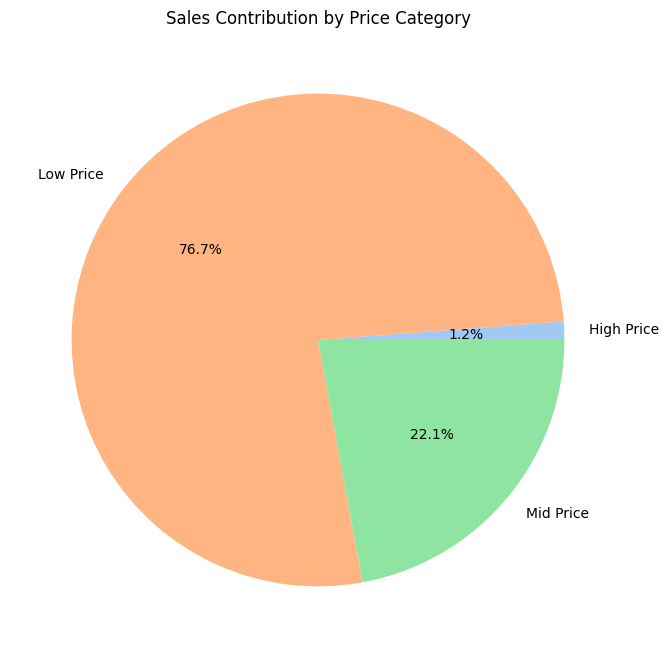

In [14]:
# Categorical Segmentation
# Categorize products into price ranges
def categorize_price(price):
    if price < 5:
        return 'Low Price'
    elif 5 <= price <= 20:
        return 'Mid Price'
    else:
        return 'High Price'

df['PriceCategory'] = df['UnitPrice'].apply(categorize_price)

# Group by new category
price_category_sales = df.groupby('PriceCategory')['TotalPrice'].sum()

# Plot the price category sales in a pie chart
price_category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=sns.color_palette('pastel'))
plt.title('Sales Contribution by Price Category')
plt.ylabel('')
plt.show()

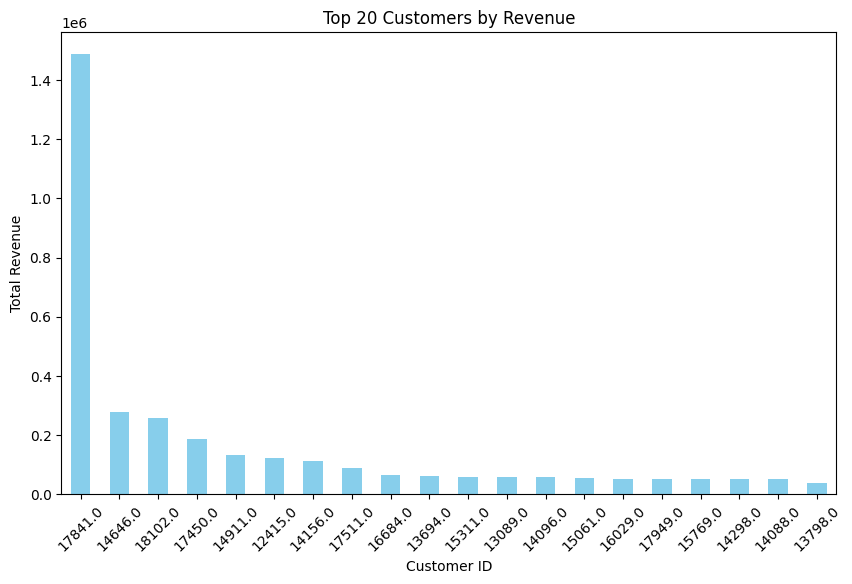

In [15]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(20)
top_customers.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 20 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Extract time-based features
# Extracting weekday name
df['WeekDay'] = df['InvoiceDate'].dt.strftime('%a')

# Extracting day
df['Day'] = df['InvoiceDate'].dt.day

# Extracting month
df['Month'] = df['InvoiceDate'].dt.month

# Extracting Year
df['Year'] = df['InvoiceDate'].dt.year

#df['TotalAmount'] = df['Quantity']*df['UnitPrice']
df['TotalPrice'] = df['TotalPrice'].apply(lambda x:abs(x))
df['UnitPrice'] = df['UnitPrice'].apply(lambda x:abs(x))
df['Quantity'] = df['Quantity'].apply(lambda x:abs(x))

# univariate Analysis
## Analysing Year,Month,Day Feature

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,PriceCategory,WeekDay,Day,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Low Price,Wed,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Low Price,Wed,1,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Low Price,Wed,1,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Low Price,Wed,1,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Low Price,Wed,1,12,2010


<Axes: xlabel='Year', ylabel='count'>

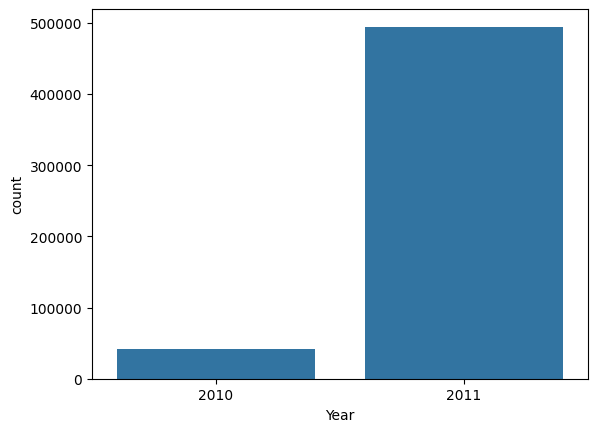

In [18]:
sns.countplot(df,x='Year') 

<Axes: xlabel='Month', ylabel='count'>

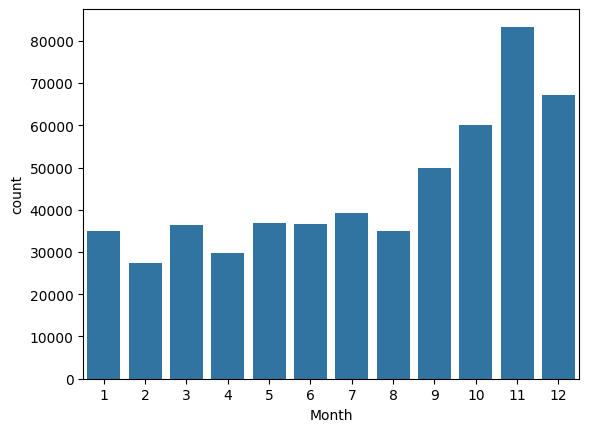

In [19]:
sns.countplot(df,x='Month')

<Axes: xlabel='WeekDay', ylabel='count'>

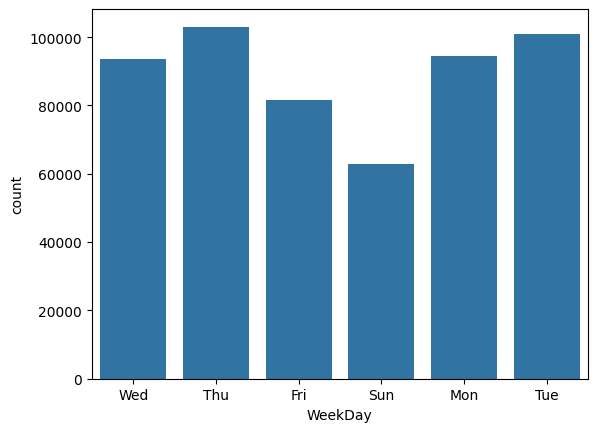

In [20]:
sns.countplot(df,x='WeekDay')

# bivariate Analysis

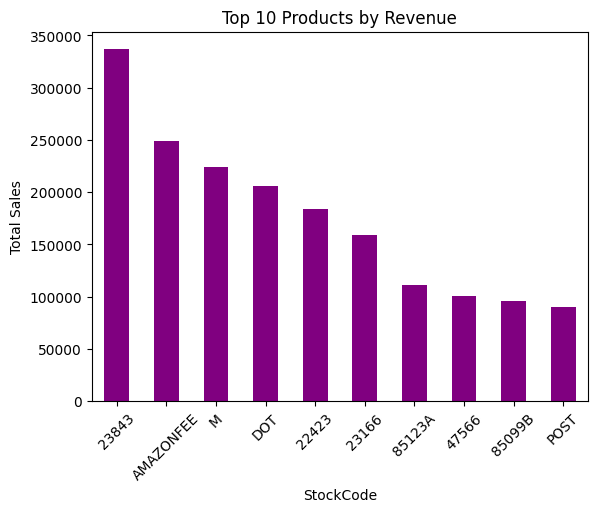

In [22]:
product_sales = df.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False)

product_sales.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Products by Revenue')
plt.xlabel('StockCode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

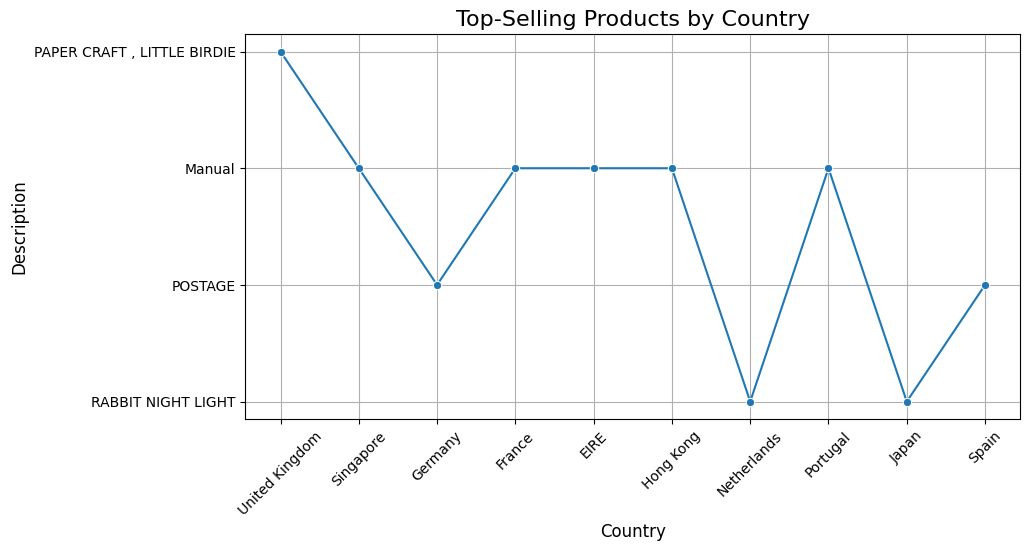

In [23]:
# Identify the top-selling product in each country
top_selling_products = (
    df.groupby(['Country', 'Description'])
    .agg({'TotalPrice': 'sum'})
    .reset_index()
    .sort_values(['Country', 'TotalPrice'], ascending=[True, False])
    .drop_duplicates(subset=['Country'], keep='first')
)

# Sort data for better visualization
top_selling_products_sort = top_selling_products.sort_values(by='TotalPrice', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=top_selling_products_sort,
    x='Country',        
    y='Description', 
    marker='o'       
)

plt.title('Top-Selling Products by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Description', fontsize=12)
plt.xticks(rotation=45) 
plt.grid()
plt.show()


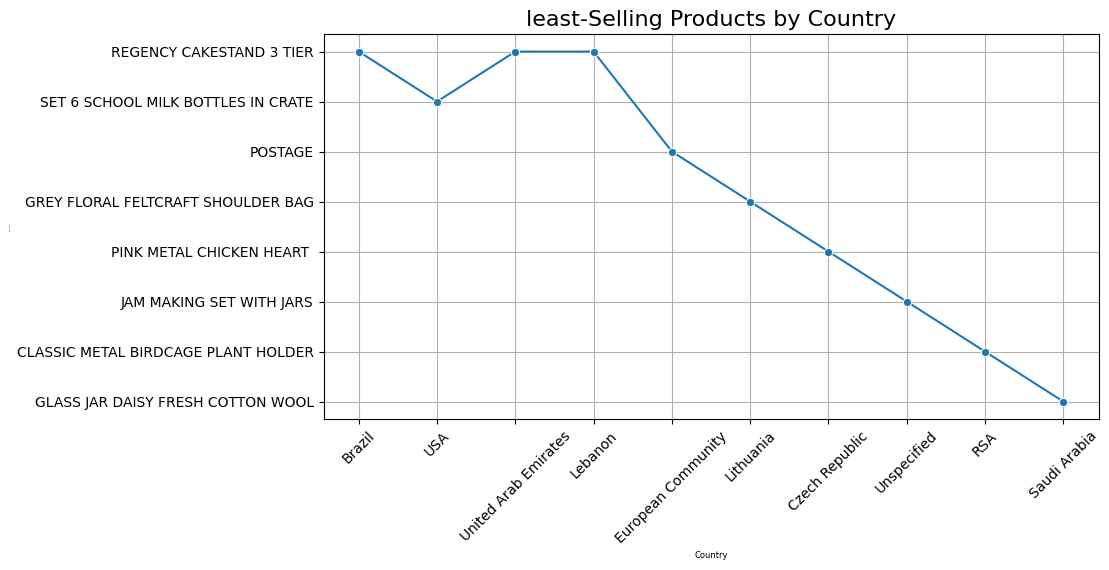

In [24]:
least_selling_products_sort = top_selling_products.sort_values(by='TotalPrice', ascending=False).tail(10)
# Create a line plot with descriptions
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=least_selling_products_sort,
    x='Country',        
    y='Description', 
    marker='o'       
)

plt.title('least-Selling Products by Country', fontsize=16)
plt.xlabel('Country', fontsize=6)
plt.ylabel('Description', fontsize=1)
plt.xticks(rotation=45) 

# Show plot
plt.grid()
plt.show()

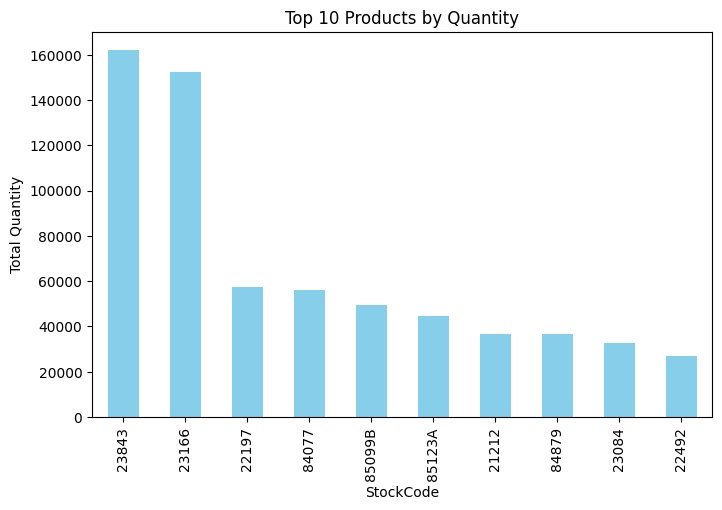

In [25]:
# Top 10 Products by Quantity
top_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Products by Quantity")
plt.xlabel("StockCode")
plt.ylabel("Total Quantity")
plt.show()

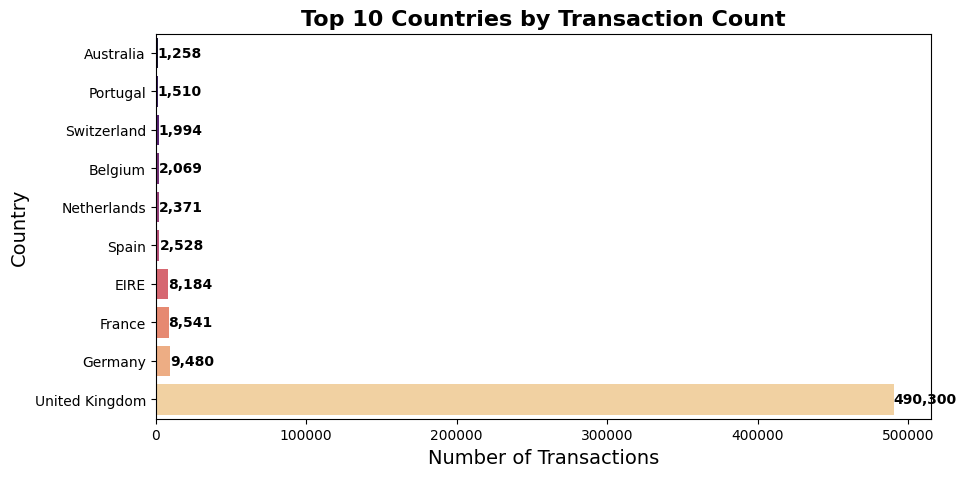

In [26]:
# Country-wise Sales Count (Top 10 Countries)
plt.figure(figsize=(10, 5))
top_countries = df['Country'].value_counts().nlargest(10).sort_values(ascending=True)

# Horizontal bar plot for better readability
sns.barplot(y=top_countries.index, x=top_countries.values, palette="magma")

# Add title and labels
plt.title("Top 10 Countries by Transaction Count", fontsize=16, fontweight='bold')
plt.xlabel("Number of Transactions", fontsize=14)
plt.ylabel("Country", fontsize=14)

# Add value labels to each bar
for index, value in enumerate(top_countries.values):
    plt.text(value, index, f"{value:,}", va='center', ha='left', fontweight='bold')

plt.show()


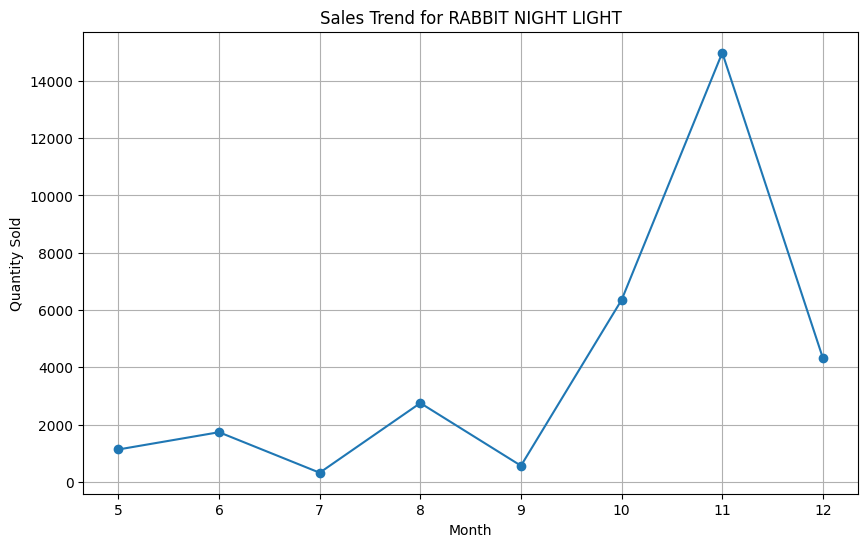

In [27]:
# Group by product and month, summing quantities sold
monthly_sales = df.groupby(['Month', 'Description'])['Quantity'].sum().reset_index()

# --- Line Plot for a Specific Product ---
product = "RABBIT NIGHT LIGHT"  # Replace with your product of interest
product_sales = monthly_sales[monthly_sales['Description'] == product]

plt.figure(figsize=(10, 6))
plt.plot(product_sales['Month'].astype(str), product_sales['Quantity'], marker='o')
plt.title(f'Sales Trend for {product}')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.grid()
plt.show()

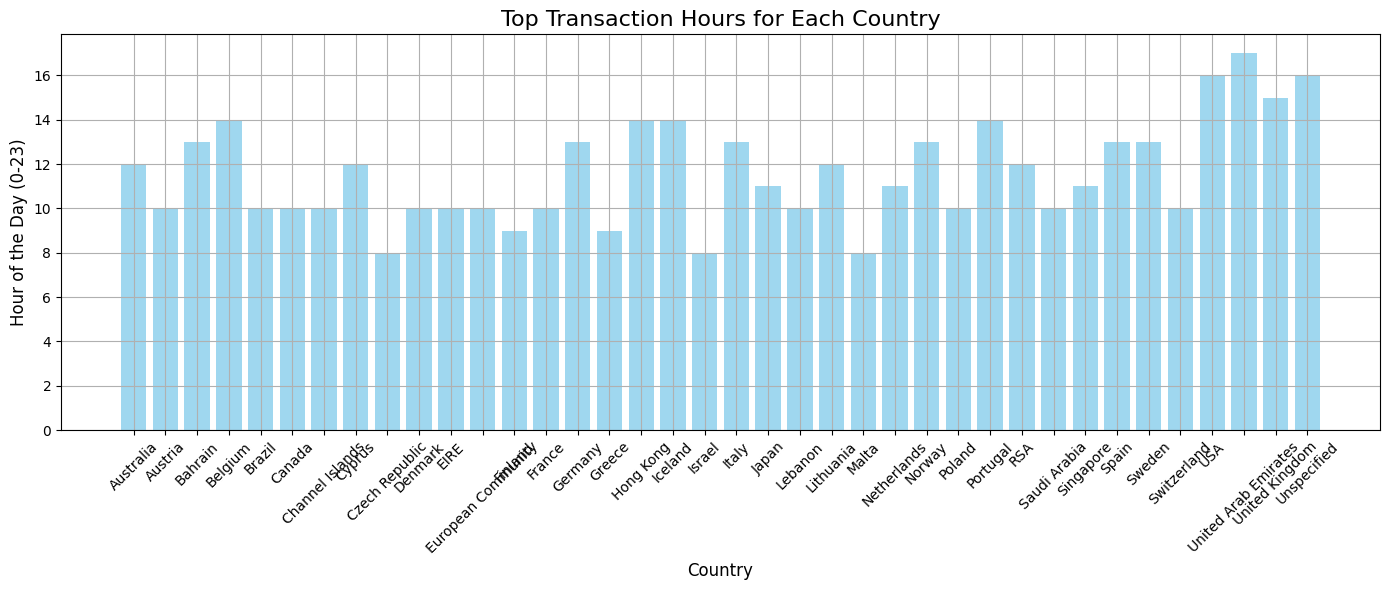

In [28]:
# Extract the hour from the InvoiceDate
df['Hour'] = df['InvoiceDate'].dt.hour
# Group by Country and Hour to count transactions
hourly_transactions = df.groupby(['Country', 'Hour']).size().reset_index(name='TransactionCount')

# Find the hour with the highest transaction count for each country
top_hours = hourly_transactions.loc[hourly_transactions.groupby('Country')['TransactionCount'].idxmax()]

# Plotting the top transaction hours for each country
plt.figure(figsize=(14, 6))
plt.bar(top_hours['Country'], top_hours['Hour'], color='skyblue', alpha=0.8)

# Add titles and labels
plt.title('Top Transaction Hours for Each Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Hour of the Day (0-23)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
# Show the plot
plt.show()